### **Import Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

%matplotlib inline

#calculate multicollinearity (vif score)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

### **Load dataset**

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 26 dan 28/Assignment 26/TelcoCustomerChurn.csv')

In [ ]:
# Showing top 5 rows of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Observations:
1. All columns, except the `tenure`, `MonthlyCharges`, and `TotalCharges`, contain categorical or binary data.
2. The `PhoneService`, `PaperlessBilling`, `Partner`, `Dependents`, and `Churn` columns appear to be categorical with values like Yes or No.
3. The `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies` columns appear to have categorical data with values like Yes, No, and No internet/phone service.
4. `SeniorCitizen` is apparently also binary (0,1).
5. No obvious defects are identified in the data, and the column names align with their respective entries.

## **Data Cleaning**

### **Missing Value**

In [ ]:
df.eq(' ').sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In the DataFrame, there are 11 data in the `TotalCharges` contains white space so we must exclude

In [ ]:
#Exclude rows with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [ ]:
# check
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observations:
1. After excluding rows with `TotalCharges` column contains white space, the dataset comprises **21 columns** and a total of **7032 rows**.
2. The dataset has **no missing values** (non-null counts are consistent across all columns).

### **Duplicated Data Check**

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

no duplicate entries in the data, each primary key is unique and not repeated

### **Data understanding**

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


The `monthlyCharges` variable has an incorrect data type (object), and it needs to be converted to a float data type

In [ ]:
#Transform TotalCharges col to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [ ]:
#show info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observations:
1. After excluding rows with `TotalCharges` column contains white space, the dataset comprises **21 columns** and a total of **7032 rows**.
2. The dataset has **no missing values** (non-null counts are consistent across all columns).
3. All data types (dtypes) seem **appropriate**, given the corresponding column name.

### **Statistical summary**


In [ ]:
categorical = []
numeric = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical.append(col)
    else:
        numeric.append(col)

In [ ]:
# numerical statistical summary
df[numeric].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations:
* Minimum and maximum values in each column make sense, indicating no outliers or unrealistic data points.
* `SeniorCitizen` is a binary column (0 or 1), representing whether a customer is a senior citizen.
* `Tenure` represents the months a customer has been with the service, with a mean of around 32 months. Customer tenure ranges from 1 month up to a maximum of 72 months (6 years).
* `MonthlyCharges` has a mean of around 64.80, ranging from 18.25 to 118.75. About 75% of customers pay less than $89.86 per month.

* `TotalCharges` has a mean of approximately 2283.30, ranging from 18.80 to 8684.80. About 75% of customers have total charges less than $3794.74. The distribution appears positively skewed, indicating a concentration of customers with lower total charges.

In [ ]:
# categorical summary
for category in categorical:
    print(df[category].value_counts())
    print()

7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64

Male      3549
Female    3483
Name: gender, dtype: int64

No     3639
Yes    3393
Name: Partner, dtype: int64

No     4933
Yes    2099
Name: Dependents, dtype: int64

Yes    6352
No      680
Name: PhoneService, dtype: int64

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, 

Observations:
* `Gender` distribution is fairly balanced: 3549 males and 3483 females.
* `Partner` status shows a slight imbalance: 3639 without a partner, 3393 with a partner.
* Majority have no dependents (4933), while 2099 have dependents.
* Most individuals have `PhoneService` (6352), only 680 don't.
*` MultipleLines` distribution: 3385 with no multiple lines, 2967 with, and 680 without phone service.
* Fiber optic is the most common `InternetServic`e (3096), followed by DSL (2416), and 1520 have no internet service.
* Majority lack `OnlineSecurity` (3497), while 2015 have it. 1520 have no internet service. Similar trend for `OnlineBackup`, `DeviceProtection`, and `TechSupport`.
* More individuals lack `StreamingTV` (2809) than those who have it (2703). Similar trend for `StreamingMovie`.
* `Contract` distribution: Month-to-month (3875), two-year (1685), one-year (1472).
* 4168 individuals have `PaperlessBilling`, 2864 do not.
* `PaymentMethod` distribution is relatively balanced: Electronic check (2365), mailed check (1604), bank transfer (automatic) (1542), credit card (automatic) (1521).
* `Churn` status imbalance: 5163 not churning, 1869 churning.

In [ ]:
# describe method on categorical data
df[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Observations:
* `Gender` has two values: 'Male' and 'Female', with 'Male' being the most common (3549).
* Categories like `Partner`, `Dependants`,` PhoneService`, `PaperlessBilling`, and Churn have 'Yes' and 'No' options. 'No' is the top value for Partner, `Dependants`, and` Churn`, while 'Yes' is the top value for PhoneService and PaperlessBilling.
* `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`,` StreamingTV`, and `StreamingMovies` have three options, with 'No' being the most common.
* `InternetService` has three options, and 'Fiber optic' is the most prevalent with a value of 3096.
* `Contract` has three options, and the majority opt for a month-to-month contract (3875).
* `PaymentMethod` offers four choices, and 'Electronic check' is the most common with a value of 2365.

### **Outlier Handling**

In [ ]:
# group column names based on type
# it will make our life easier onwards
category_columns = ['Churn', 'gender', 'Partner', 'Dependents','PhoneService', 'PaperlessBilling', 'MultipleLines','OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

ordinal_columns = ['InternetService', 'Contract', 'PaymentMethod']

numerical_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
def numeric_plot(df, numerical, type):

    numeric = numerical_columns[1:]
    columns = ['Tenure', 'Monthly Charges', 'Total Charges']

    fig_num, axes_num = plt.subplots(1,3, figsize= (16,5))

    colors = ['#EC407A', '#A569BD','#00ACC1']

    for index, axes in enumerate(axes_num.ravel()):
        if type == 'hist':
            plot = sns.histplot(df[numeric[index]],
                                kde=True, ax=axes, color = colors[index])
        elif type == 'box':
            plot =  sns.boxplot(df[numeric[index]],
                                ax=axes, color = colors[index])
        plot.set(xlabel = '', ylabel='Frequency', title = columns[index])


    fig_num.tight_layout()

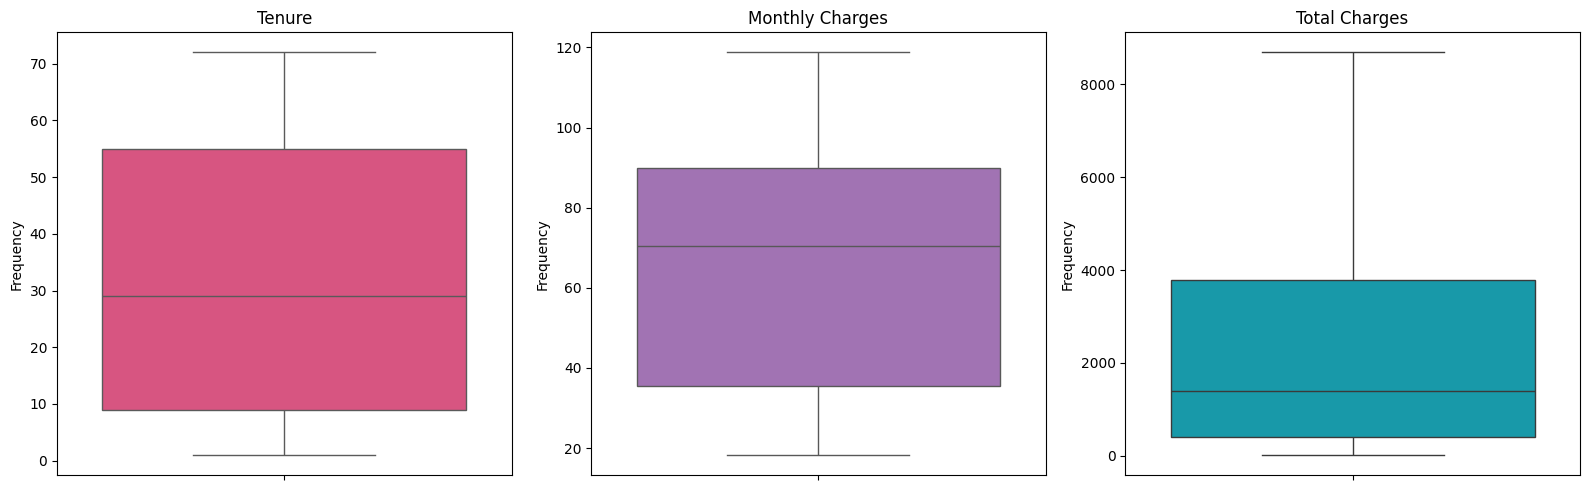

In [ ]:
numeric_plot(df, numerical_columns, 'box')

Observations:
* No outliers detected in `Tenure`, `MonthlyCharges`, and `TotalCharges`.
* `Tenure` shows a consistent distribution without extreme values, indicating similar customer tenures.
* `MonthlyCharges` lack outliers, suggesting uniformity in charges without significant deviations.
* `TotalCharges` exhibit no outliers, indicating a uniform distribution without exceptionally high or low charges.

### **KDE plot for knowing the distribution form**

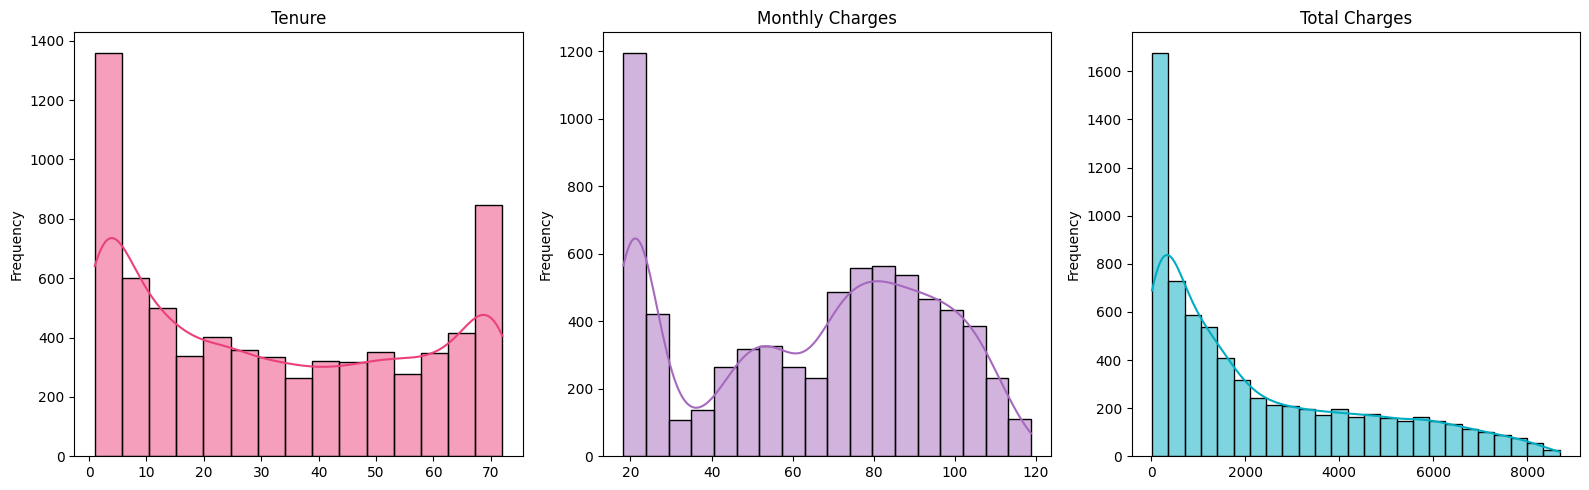

In [ ]:
numeric_plot(df, numerical_columns, 'hist')

Observation:
*   `Tenure` suggests that a considerable number of customers have shorter tenure durations, as indicated by the peak around the lower values. The distribution is right-skewed, with a tail extending towards higher tenure values.
* `MonthlyCharges` exhibit a peak around the mid-range values, as indicated by the histogram. The distribution is somewhat symmetric.
* The histogram for `TotalCharges` is positively skewed, with a concentration towards lower values. A significant number of customers appear to have lower total charges, as evidenced by the peak around the lower values.

Conclusion:
* A significant portion of customers has shorter durations. Monthly charges are distributed more evenly, while total charges show a skew towards lower values, implying that many customers have lower overall expenditures.

### **Countplot for Categorical Columns**

In [ ]:
def categorical_plots(df, category, type):

    num_cols = 3
    length = len(category)
    num_rows = length // 3 + 1 if length % 3 != 0 else length // 3

    size_x = num_cols * length if type == 'categorical' else num_cols * 7
    size_y = num_cols * num_rows if type == 'categorical' else num_cols * 2


    fig, axs = plt.subplots(num_rows, num_cols, figsize=(size_x,size_y))

    colors = ['#EC7063', '#A569BD','#EC407A', '#2196F3', '#00ACC1', '#FB8C00', '#51a027']

    for index, axes in enumerate(axs.flatten()[:len(category)]):
        df[category[index]].value_counts(normalize=True).plot(kind='bar',
                                                              ax = axes,
                                                              title = category[index].capitalize(),
                                                              color = colors[index]).set_xlabel("")
        axes.set_ylim(0,1)

        if type == 'categorical':
            axes.tick_params(axis='x', rotation=0)
        else:
            axes.tick_params(axis='x', rotation=45)

        position = df[category[index]].value_counts(normalize=True)
        get_position = position.tolist()
        data_point = position.apply(lambda x : x*100).astype('str').apply(lambda x : x[:5] +" %").tolist()

        for i in range(len(get_position)):
            axes.text(i, get_position[i], data_point[i],
                      ha='center', color = 'black', fontsize=10)

    plt.subplots_adjust(wspace=0.2,
                        hspace=0.3)

In [ ]:
category_1 = category_columns[:len(category_columns)//2]
category_2 = category_columns[6:]

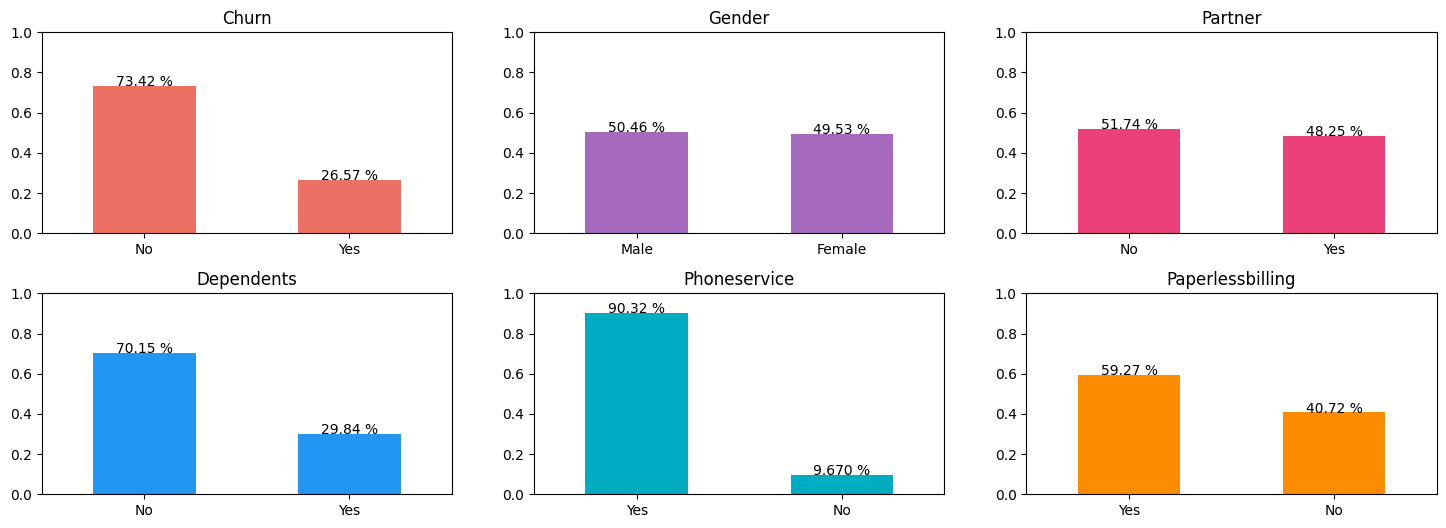

In [ ]:
categorical_plots(df, category_1, 'categorical')

Observations:
* The majority of customers, around 73.42%, remained subscribed, while approximately 26.57% of customers decided to stop subscribing, indicating churn.
* The distribution of users, both in terms of gender and partner statuses, is impressively balanced. We have an equitable representation of both male and female users, as well as individuals with and without partners.
* There's a clear difference between customers with and without dependents, where 29.84% have dependents. Similar patterns are noticed in the use of telephone services.
* There's a somewhat similar percentage of customers choosing paperless billing and not, most customers show a strong preference for using paperless billing.

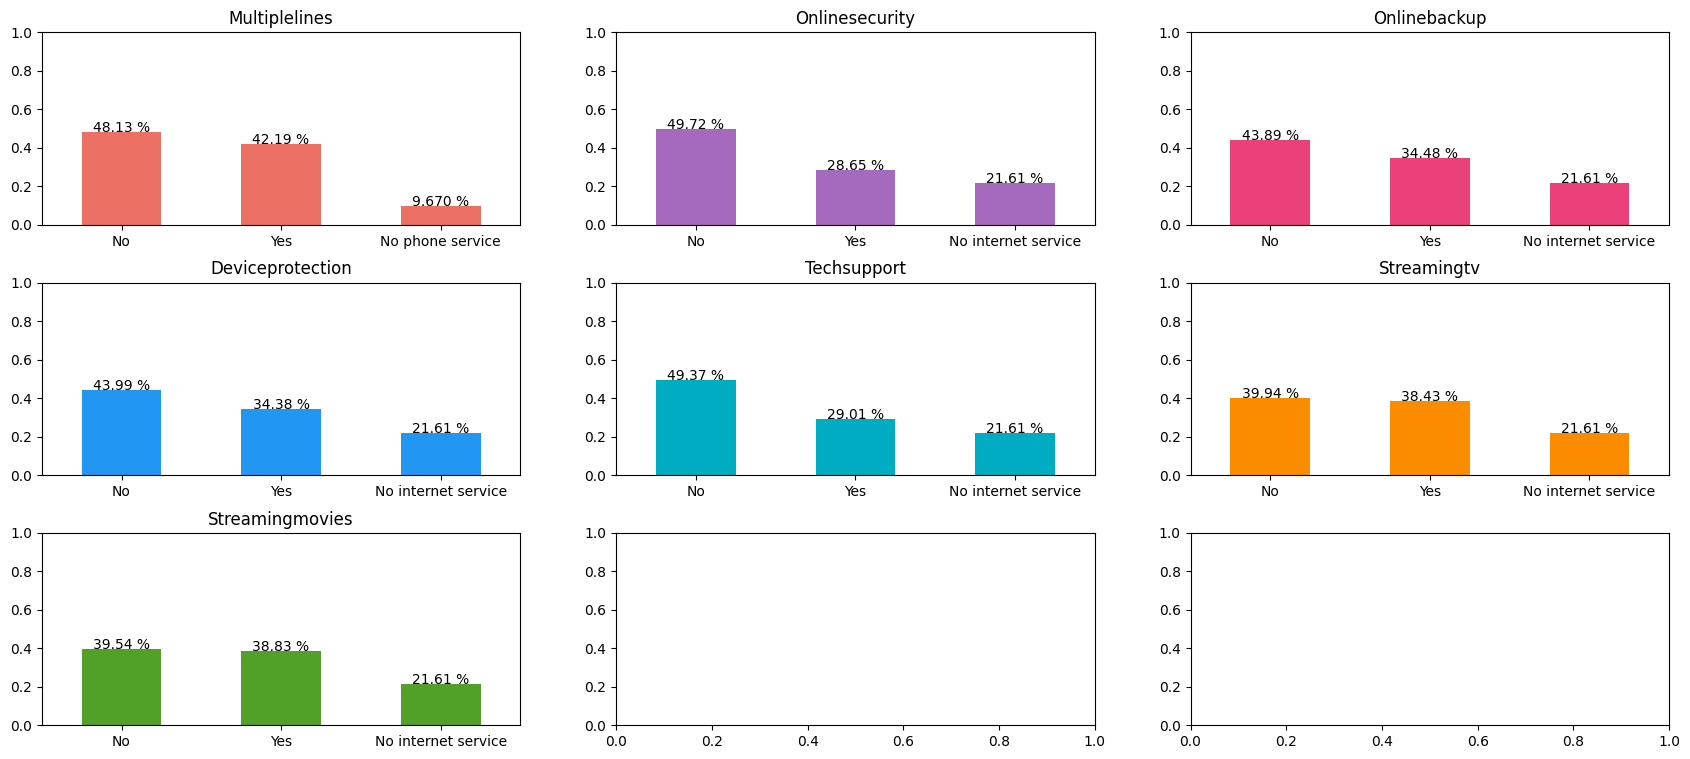

In [ ]:
categorical_plots(df, category_2, 'categorical')

Observations:
* Almost the same persentage of customers use or don't use features like `MultipleLines`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, and `StreamingMovies`. But most folks is not use them.

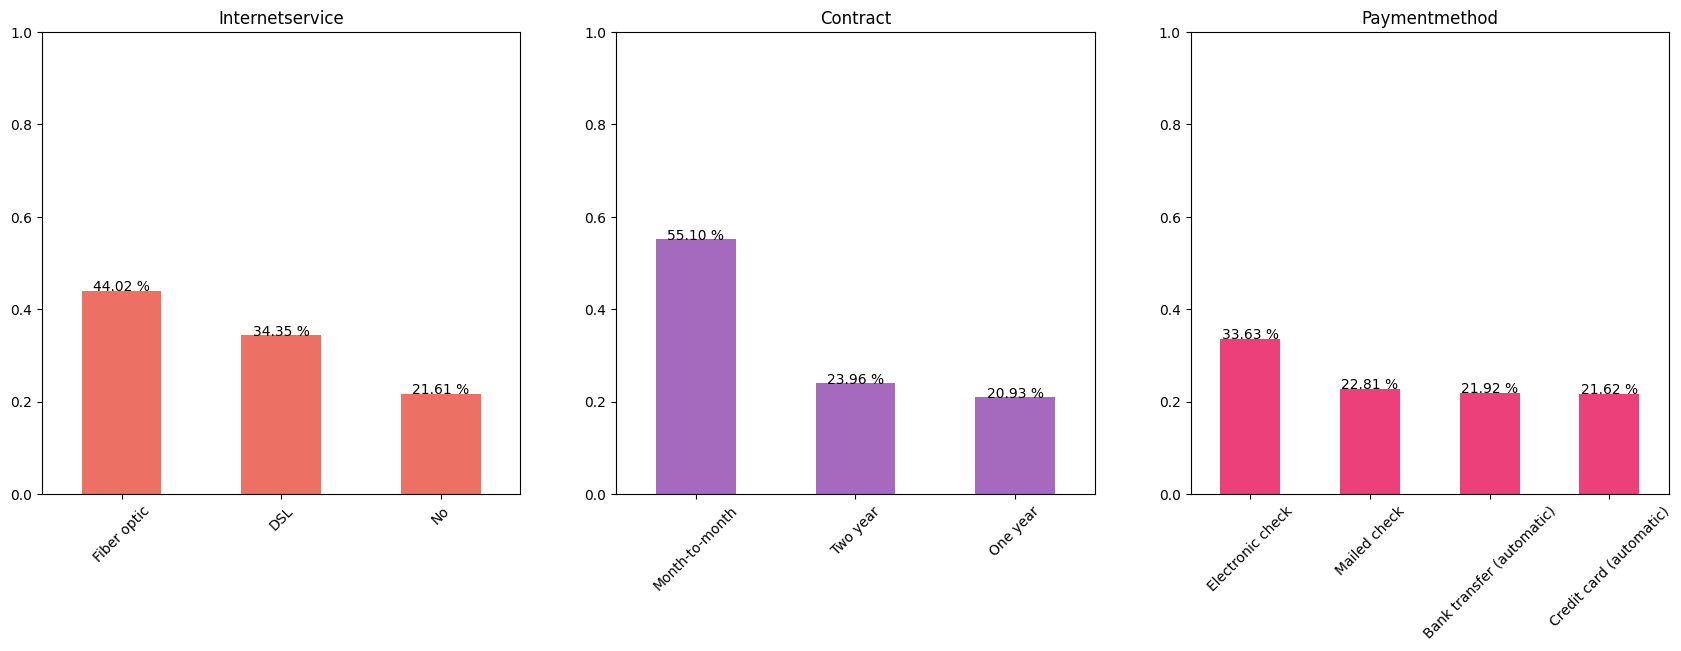

In [ ]:
categorical_plots(df, ordinal_columns, 'ordinal')

Observations:
* The majority of customers prefer fiber optic service over DSL and no internet service, according to the service usage graph.
* A clear difference in the contract graph shows that more than 50% of customers prefer monthly payments instead of annual contracts.
* Electronic checks are the most popular payment method among customers, while other payment methods show relatively equal percentages.

## **Data Preprocessing**

### **Label Encoding and One Hot Encoding**

In [ ]:
#see the unique values of each column
for col in df.columns:
    if df[col].dtypes == object:
        print('{} : {}'.format(col, df[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
# Encode the categorical variable into numeric
def label_encoding(df, ordinal_columns):

    categoricals = df.drop(columns = ordinal_columns, axis=1).columns

    for col in categoricals:
        df[col] = df[col].replace({'Male' : 1.0, 'Female' : 0.0,
                                   'Yes' : 1.0, 'No' : 0.0,
                                   'No phone service' : 0.0,
                                   'No internet service' : 0.0})
    # delete the customer column
    return df.drop(columns = 'customerID', axis=1)

In [ ]:
label_encoding(df, ordinal_columns).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [ ]:
# Encode ordinal columns, and drop last encoding-columns to avoid multicollinearity
def onehotencoding(df, columns):

    onehot = pd.DataFrame()
    for col in columns:
        encoding = pd.get_dummies(df[col], prefix=col, dtype='float')
        encoding = encoding.drop(encoding.columns[-1], axis=1)
        onehot = pd.concat([onehot, encoding], axis=1)

    return onehot

In [ ]:
onehotencoding(df, ordinal_columns).head()

,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0


All columns have been converted to numeric, and we also removed the last column in Internet Service, Contract, and PaymentMethod because failing to do so would result in a very high Variance Inflation Factor (VIF).

### **Multicolinearity Handling**

In [ ]:
# Calculate multicollinearity
def calculate_vif(feature):
    X = add_constant(feature)
    vif_df = pd.DataFrame([vif(X.values, i) for i in range(X.shape[1])],
                          index = X.columns).reset_index()
    vif_df.columns = ['feature', 'vif_score']
    vif_df = vif_df.loc[vif_df.feature != 'const']
    return vif_df

In [ ]:
# Final cleaning to get feature and target data
def feature_cleaning(df, ordinal_columns):
    df_encode = label_encoding(df, ordinal_columns)

    # Drop the ordinal columns from dataframe first
    df_encode = df_encode.drop(columns=ordinal_columns)
    feature = df_encode.drop(columns='Churn')
    target = df_encode['Churn']
    target = target.astype('int')

    # Drop MonthlyCharges and TotalCharges since their vif score are high/ high correlated
    feature = feature.drop(columns=['MonthlyCharges','TotalCharges'], axis=1)

    # Encode ordinal columns in the dataframe
    onehot = onehotencoding(df, ordinal_columns)
    feature = pd.concat([feature, onehot], axis=1)
    return feature, target

After split the features and target, we found high VIF values (>10) in the following columns:

- `PhoneService` (34.893857)
- `StreamingTV` (24.080019)
- `StreamingMovies` (24.156394)
- `MonthlyCharges` (866.089640)
- `TotalCharges` (10.811490)
- `InternetService_DSL` (138.718618)
- `InternetService_Fiber` optic (592.296922)

We decided to remove the column with the highest VIF, which is `MonthlyCharges`. However, this still leaves us with columns having high VIF:

- `Tenure` (7.572242)
- `TotalCharges` (10.781958)

Thus, we will further remove the column with the highest VIF, which is `TotalCharges`, to achieve acceptable VIF values.

In [ ]:
feature, target = feature_cleaning(df, ordinal_columns)

# Check the vif score
calculate_vif(feature)

,feature,vif_score
1,gender,1.001769
2,SeniorCitizen,1.153168
3,Partner,1.462369
4,Dependents,1.380811
5,tenure,2.827609
6,PhoneService,1.354768
7,MultipleLines,1.423682
8,OnlineSecurity,1.415235
9,OnlineBackup,1.380823
10,DeviceProtection,1.480118


<Axes: >

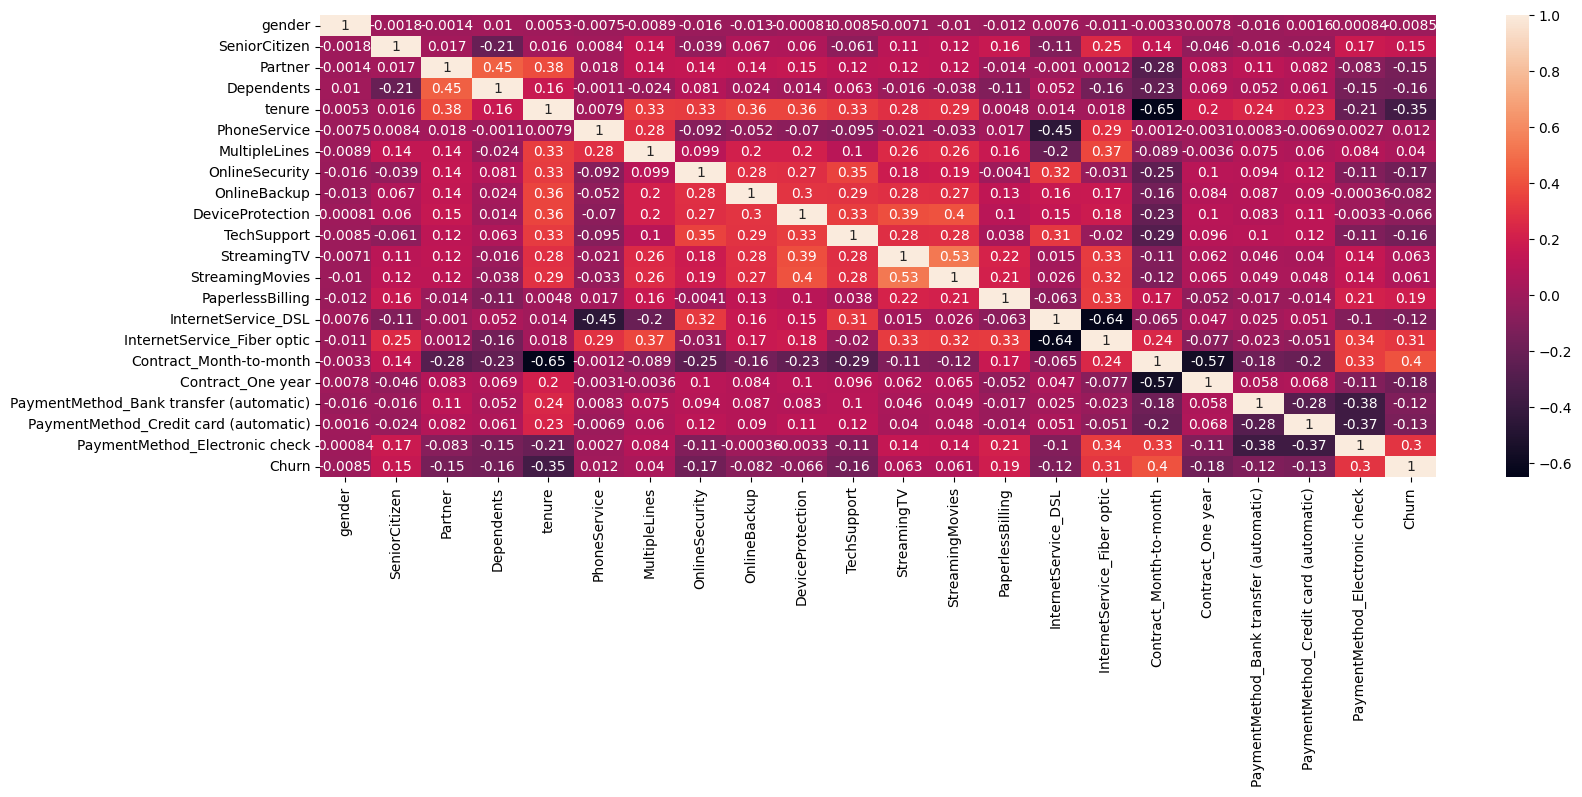

In [ ]:
correlation = pd.concat([feature, target], axis=1)

plt.figure(figsize=(18,6))
sns.heatmap(correlation.corr(), annot=True)

It appears that there are no variables with strong correlations, indicating good VIF values and effectively addressed multicollinearity issues. Good!

Now we will try the model without SMOTE and with SMOTE to compare their results.

### **Machine Learning Model**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report

In [ ]:
X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature,
                                                        target,
                                                        test_size=0.2,
                                                        random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_pretrain,
                                                    y_pretrain,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Original feature and target shape of our dataset
print('Shape of original feature data : {}'.format(feature.shape))
print('Shape of original target data : {}'.format(target.shape))
print()

# Shape of X_train and y_train data
print('Shape of X_train data : {}'.format(X_train.shape))
print('Shape of y_train data : {}'.format(y_train.shape))
print()

# Shape of X_test and y_test data
print('Shape of X_test data : {}'.format(X_test.shape))
print('Shape of y_test data : {}'.format(y_test.shape))
print()

# Shape of X_val and y_val data
print('Shape of X_val data : {}'.format(X_val.shape))
print('Shape of y_val data : {}'.format(y_val.shape))
print()

Shape of original feature data : (7032, 21)
Shape of original target data : (7032,)

Shape of X_train data : (4500, 21)
Shape of y_train data : (4500,)

Shape of X_test data : (1125, 21)
Shape of y_test data : (1125,)

Shape of X_val data : (1407, 21)
Shape of y_val data : (1407,)



In [ ]:
# Model fitting and calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train.to_numpy(), y_train.to_numpy())

# Random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train.to_numpy(), y_train.to_numpy())

# XGBosst classifier
xgb = XGBClassifier()
xgb.fit(X_train.to_numpy(), y_train.to_numpy())

models = [tree, forest, xgb]

In [ ]:
def confusion_matrix_viz(model, X_train, X_test, X_val, y_train, y_test, y_val):

    name = type(model).__name__
    name = re.findall('[A-Z][^A-Z]*', name)
    model_name = ''.join(name[:-1])

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    categories = ['No Churn', 'Churn']

    data_label = ['Training', 'Test', 'Validation']

    X = [X_train, X_test, X_val]
    y = [y_train, y_test, y_val]

    fig, axs = plt.subplots(1, 3, figsize=(20,5))

    for i, axes in enumerate(axs.flatten()):
        y_pred = model.predict(X[i])
        cm = confusion_matrix(y[i], y_pred)

        group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
        group_percentage = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]

        labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentage)]
        labels = np.asarray(labels).reshape(2,2)

        plot = sns.heatmap(cm, annot=labels, fmt='',
                           ax = axes, cmap='Blues', cbar = True,
                           xticklabels = categories, yticklabels=categories)
        plot.set(title = model_name + ' --- ' + data_label[i], xlabel='Predicted Value', ylabel='True Value')

### **Decission Tree**

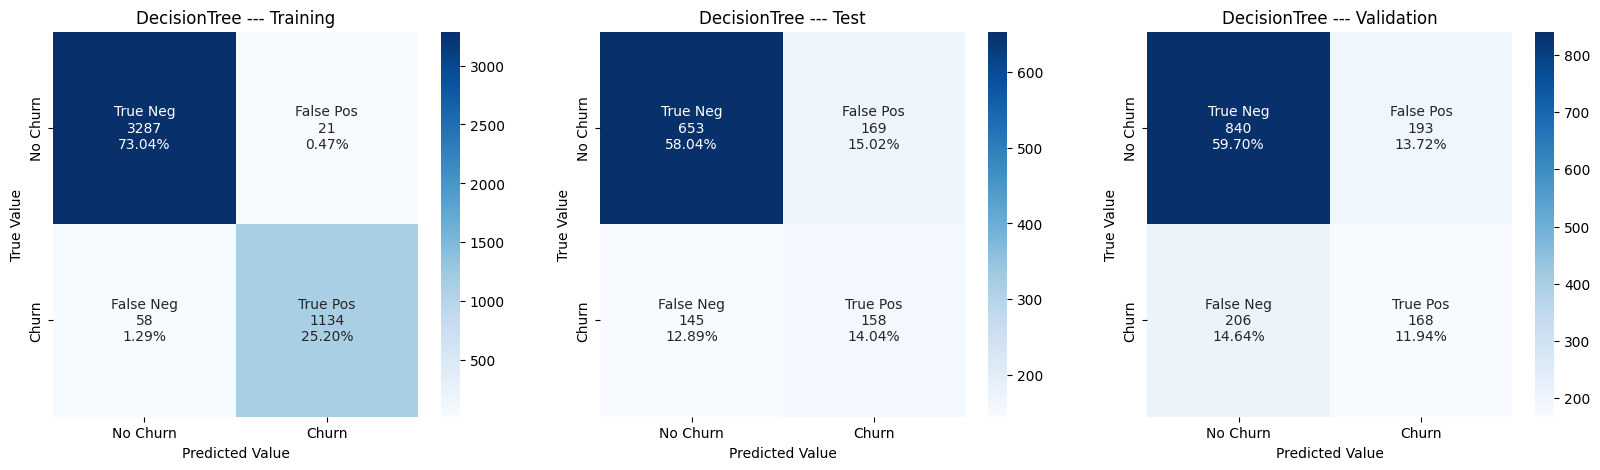

In [ ]:
confusion_matrix_viz(tree, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.98      0.99      0.99      3308
       Churn       0.98      0.95      0.97      1192

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [ ]:
y_pred = tree.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.82      0.79      0.81       822
       Churn       0.48      0.52      0.50       303

    accuracy                           0.72      1125
   macro avg       0.65      0.66      0.65      1125
weighted avg       0.73      0.72      0.72      1125



In [ ]:
y_pred = tree.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.80      0.81      0.81      1033
       Churn       0.47      0.45      0.46       374

    accuracy                           0.72      1407
   macro avg       0.63      0.63      0.63      1407
weighted avg       0.71      0.72      0.71      1407



**Observations:**
- The Decision Tree model performs exceptionally well on the Training dataset, indicating that the model effectively learns patterns and relationships within the training data.

- Despite the high performance on the Training dataset, there is a significant difference between the performance on Training compared to Test and Validation datasets. This suggests a possibility of overfitting, where the model overly memorizes the training data and fails to generalize patterns effectively on unseen data.

- The low precision, recall, and F1-score on the 'Churn' column of the Test and Validation datasets indicate that the model does not fully adapt to new data. The model tends to make false positive predictions or overlook positive cases that should be predicted, which can have serious consequences in practical applications, especially if prediction errors can have significant impacts.

### **Random Forest**

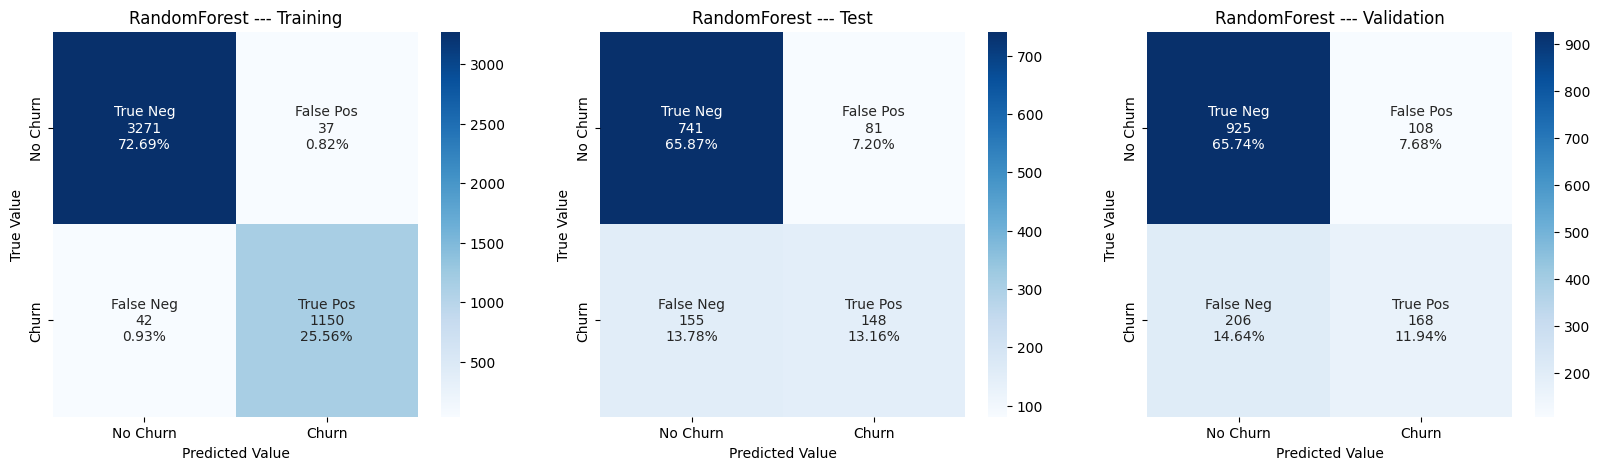

In [ ]:
confusion_matrix_viz(forest, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.99      0.99      0.99      3308
       Churn       0.97      0.96      0.97      1192

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [ ]:
y_pred = forest.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.86       822
       Churn       0.65      0.49      0.56       303

    accuracy                           0.79      1125
   macro avg       0.74      0.69      0.71      1125
weighted avg       0.78      0.79      0.78      1125



In [ ]:
y_pred = forest.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.82      0.90      0.85      1033
       Churn       0.61      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.78      0.77      1407



Observations:
- The model also demonstrates excellent performance on the Training dataset, indicating that it's not underfitting.
- There's a tendency of overfitting in the Random Forest model, where it performs very well on the training data but struggles to generalize effectively to new data. However, the precision, recall, and F1-score values obtained are higher than those of the Decision Tree model, indicating better performance, especially in identifying customers who "Churn". These results also suggest that Random Forest can address the overfitting issues that Decision Tree might encounter and provide better generalization to new data.
- In the Random Forest model, the precision value is higher than recall, where precision exceeds recall, it suggests the model excels in accurately identifying customers who are likely to churn among all predicted churn cases, aiding targeted retention efforts and minimizing false churn predictions.

### **XGboost**

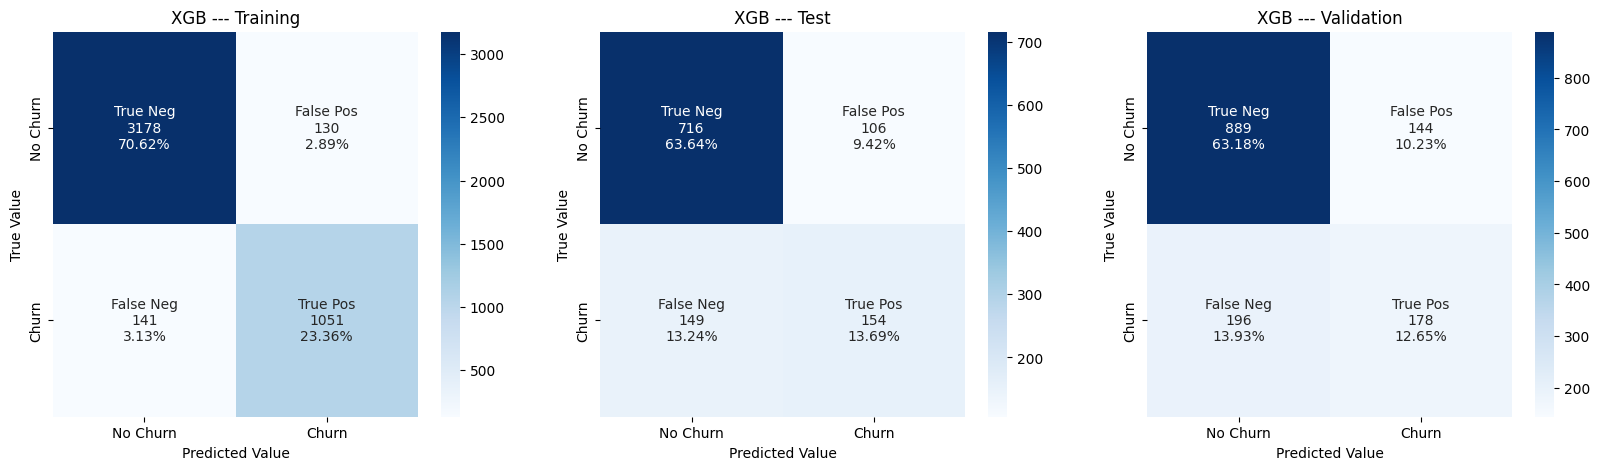

In [ ]:
confusion_matrix_viz(xgb, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = xgb.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.96      0.96      0.96      3308
       Churn       0.89      0.88      0.89      1192

    accuracy                           0.94      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500



In [ ]:
y_pred = xgb.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85       822
       Churn       0.59      0.51      0.55       303

    accuracy                           0.77      1125
   macro avg       0.71      0.69      0.70      1125
weighted avg       0.76      0.77      0.77      1125



In [ ]:
y_pred = xgb.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.82      0.86      0.84      1033
       Churn       0.55      0.48      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.75      1407



**Observations:**
- XGBoost exhibits good performance on the training data, albeit slightly below Random Forest.
- XGBoost demonstrates relatively consistent performance between Test and Validation Data, with minor differences between the two datasets.
- Notably, the precision and recall values for `Churn` in this model are relatively balanced, unlike the previous model where precision exceeded recall. In XGBoost, while precision is lower than Random Forest, recall is higher.
- Additionally, the F1 score of this model is identical to the F1 score of the Random Forest model, indicating a similar balance between precision and recall in predicting the `Churn` class across both models.

**Conclusion:**
- From the three models without imbalanced handling, XGBoost emerges as the best performer due to its relatively stable recall and precision values, along with a good F1 score compared to the other models. The consistent performance of XGBoost in terms of recall and precision indicates its ability to effectively identify customers who churn, while minimizing both false positives and false negatives. This implies that XGBoost provides reliable predictions, enabling companies to take appropriate actions to retain customers and reduce overall customer churn.

Now we will try if Imbalanced Data Handling is done with SMOTE

### **Imbalanced Data Handling**

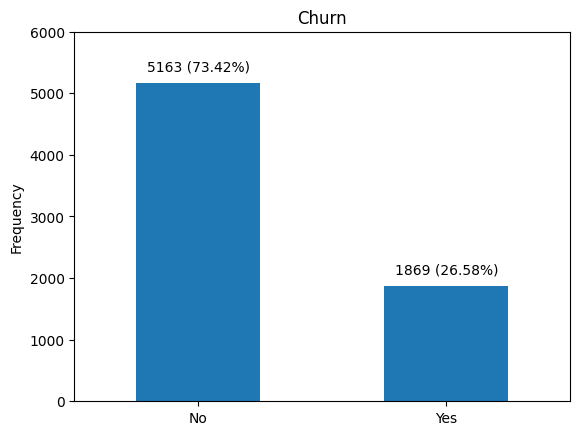

In [ ]:
def imbalanced_viz(target):
    # Mapping class labels into 'No' and 'Yes'
    target_class = target.map({0 : 'No', 1 : 'Yes'})

    # Plot the number of each class in the form of a bar chart
    target_class.value_counts().plot(kind='bar', title='Churn')
    plt.tick_params(axis='x', rotation=0)
    plt.xlabel('')
    plt.ylabel('Frequency')

    counts = target_class.value_counts()
    percentage = counts / np.sum(counts) * 100

    labels = [str(counts[0]) + " (" + f'{percentage[0]:.2f}' + '%' + ")",
              str(counts[1]) + " (" + f'{percentage[1]:.2f}' + '%' + ")"]

    for i in range(len(labels)):
        plt.text(i, counts[i] + 200, labels[i],
                 ha='center', color = 'black', fontsize=10)

    plt.ylim(0,6000)
    plt.show()

imbalanced_viz(target)

There is an imbalance in the number of churn and non-churn instances, with 5163 "no" and 1869 "yes" instances. We need to adjust the number of instances by performing oversampling.

In [ ]:
#Split data pre train dan validation
X_pretrain, X_val, y_pretrain, y_val = train_test_split(feature, target, test_size=0.2, random_state=42)

In [ ]:
#Check the shape of data

# feature and target shape
print('Feature shape before split : {}'.format(feature.shape))
print('Target shape before split : {}'.format(target.shape))
print()

# train shape, we take 80% from the original data
print('X_pretrain shape : {}'.format(X_pretrain.shape))
print('y_pretrain shape : {}'.format(y_pretrain.shape))
print()

# validation shape, we take 20% from the original data
print('X_val shape : {}'.format(X_val.shape))
print('y_val shape : {}'.format(y_val.shape))

Feature shape before split : (7032, 21)
Target shape before split : (7032,)

X_pretrain shape : (5625, 21)
y_pretrain shape : (5625,)

X_val shape : (1407, 21)
y_val shape : (1407,)


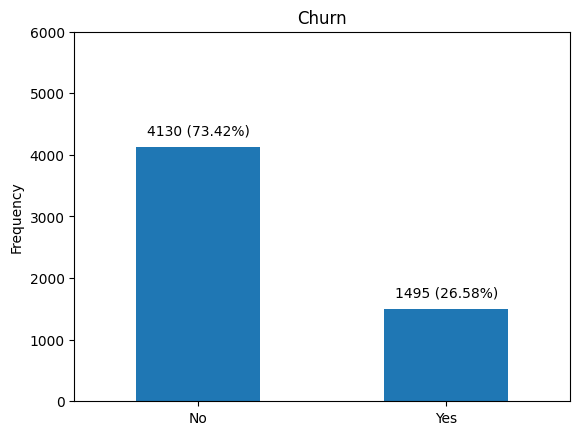

In [ ]:
imbalanced_viz(y_pretrain)

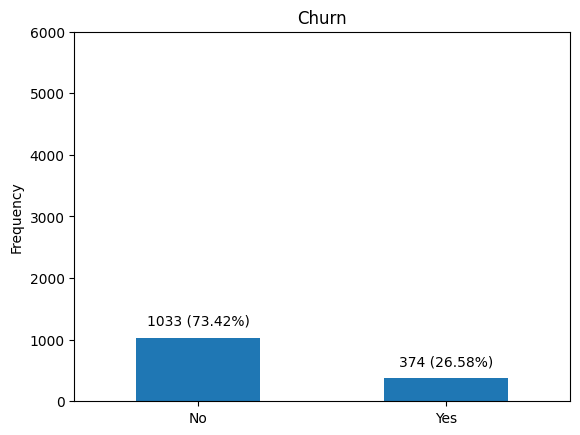

In [ ]:
imbalanced_viz(y_val)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)
X_resample, y_resample = smote.fit_resample(X_pretrain, y_pretrain)

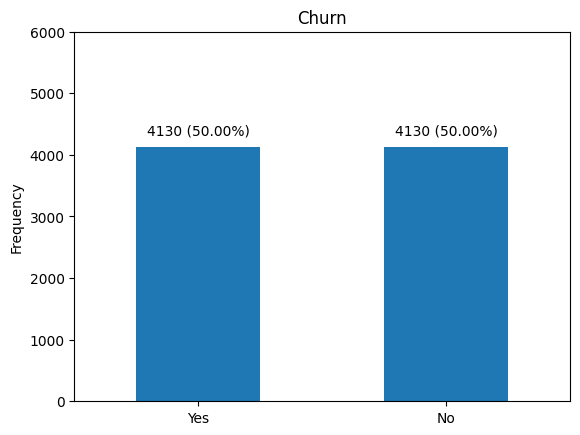

In [ ]:
imbalanced_viz(y_resample)

Great! Now the dataset is balanced

In [ ]:
# do split again
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample,
                                                    test_size=0.2,
                                                    random_state = 42)

In [ ]:
# Training data shape after SMOTE
print('Shape of X_train after SMOTE : {}'.format(X_train.shape))
print('Shape of y_train after SMOTE : {}'.format(y_train.shape))
print()

# Testing data shape after SMOTE
print('Shape of X_test after SMOTE : {}'.format(X_test.shape))
print('Shape of y_test after SMOTE : {}'.format(y_test.shape))
print()

# Valication data shape before SMOTE, this is set as a unlooked up data from machine learning model
print('Shape of X_val before SMOTE : {}'.format(X_val.shape))
print('Shape of y_val before SMOTE : {}'.format(y_val.shape))

Shape of X_train after SMOTE : (6608, 21)
Shape of y_train after SMOTE : (6608,)

Shape of X_test after SMOTE : (1652, 21)
Shape of y_test after SMOTE : (1652,)

Shape of X_val before SMOTE : (1407, 21)
Shape of y_val before SMOTE : (1407,)


### **Machine Learning Model**

In [ ]:
# Model fitting and calculation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Decision tree classifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# XGBosst classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

models = [tree, forest, xgb]

### **Decission Tree**

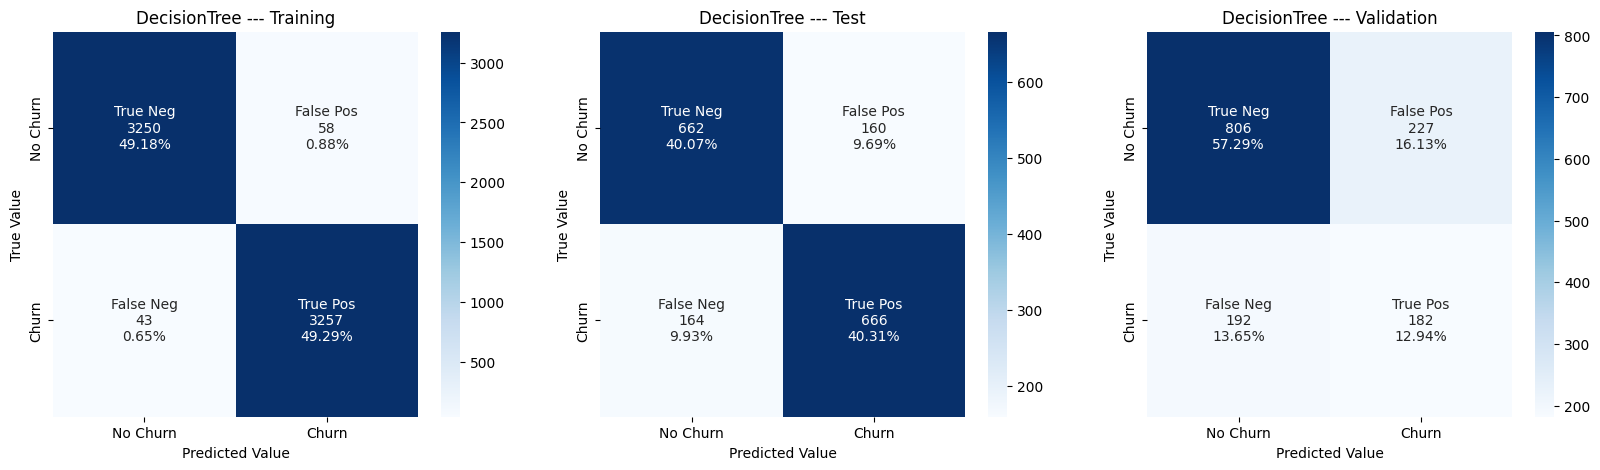

In [ ]:
confusion_matrix_viz(tree, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = tree.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.99      0.98      0.98      3308
       Churn       0.98      0.99      0.98      3300

    accuracy                           0.98      6608
   macro avg       0.98      0.98      0.98      6608
weighted avg       0.98      0.98      0.98      6608



In [ ]:
y_pred = tree.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.80      0.81      0.80       822
       Churn       0.81      0.80      0.80       830

    accuracy                           0.80      1652
   macro avg       0.80      0.80      0.80      1652
weighted avg       0.80      0.80      0.80      1652



In [ ]:
y_pred = tree.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.81      0.78      0.79      1033
       Churn       0.44      0.49      0.46       374

    accuracy                           0.70      1407
   macro avg       0.63      0.63      0.63      1407
weighted avg       0.71      0.70      0.71      1407



**Observations:**
- The Decision Tree model, after imbalance handling, also demonstrates excellent performance on the Training dataset, indicating its ability to effectively learn patterns and relationships within the training data.
- Significant differences are observed in the test data after imbalance handling, with much higher precision, recall, and F1-score compared to the model before imbalance handling. This suggests that the test data used underwent synthetic minority oversampling (SMOTE) and appears to be balanced, resulting in considerably larger performance metrics. Therefore, validation values can be utilized for further analysis.
- However, despite the high performance on the Training dataset after SMOTE, there are still notable discrepancies between the performance on Training and Validation (focusing on 'churn' data). This indicates that even after SMOTE, there is a possibility of overfitting, where the model overly memorizes the training data and fails to generalize patterns effectively on unseen data.
- Precision, recall, and F1-score (on 'Churn') are still relatively low on the Validation dataset, suggesting that the model does not fully adapt to new data. However, the values are slightly higher than without imbalance data handling.

### **Random Forest**

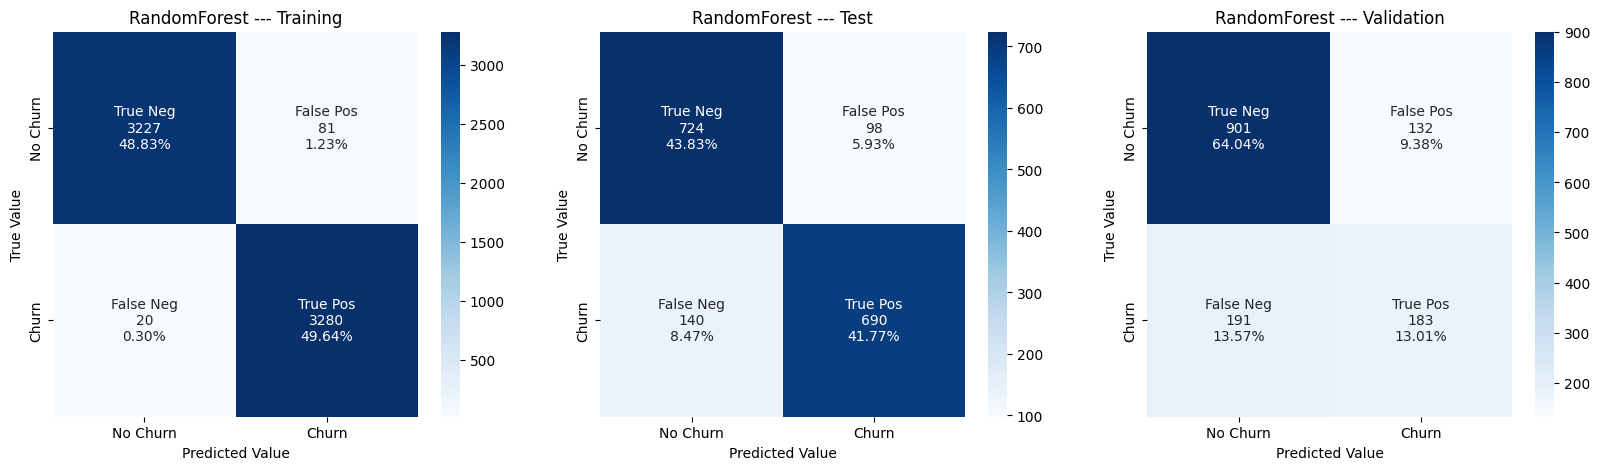

In [ ]:
confusion_matrix_viz(forest, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = forest.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.99      0.98      0.98      3308
       Churn       0.98      0.99      0.98      3300

    accuracy                           0.98      6608
   macro avg       0.98      0.98      0.98      6608
weighted avg       0.98      0.98      0.98      6608



In [ ]:
y_pred = forest.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86       822
       Churn       0.88      0.83      0.85       830

    accuracy                           0.86      1652
   macro avg       0.86      0.86      0.86      1652
weighted avg       0.86      0.86      0.86      1652



In [ ]:
y_pred = forest.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.83      0.87      0.85      1033
       Churn       0.58      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



**Observations:**
- The Random Forest model also demonstrates excellent performance on the Training dataset, with significantly higher values compared to before applying SMOTE, indicating that the model significantly improves in learning patterns and relationships within the training data after SMOTE.
- After applying SMOTE, there is still a tendency of overfitting in this model, where it performs exceptionally well on the training data but struggles to generalize effectively to new data, particularly concerning churn.
- In the validation data, we observe that after applying SMOTE, the F1-score increases from 0.51 to 0.54, and recall improves from 0.44 to 0.50. This indicates that after applying SMOTE, the model performs better, especially in identifying customers who churn.
- The accuracy obtained by this model (0.77) is also significantly higher than that of the decision tree model (0.71), indicating that the model undergoes substantial improvement in its performance, particularly in classifying minority classes, and the imbalance handling technique used effectively enhances the model's performance.

### **XGboost**

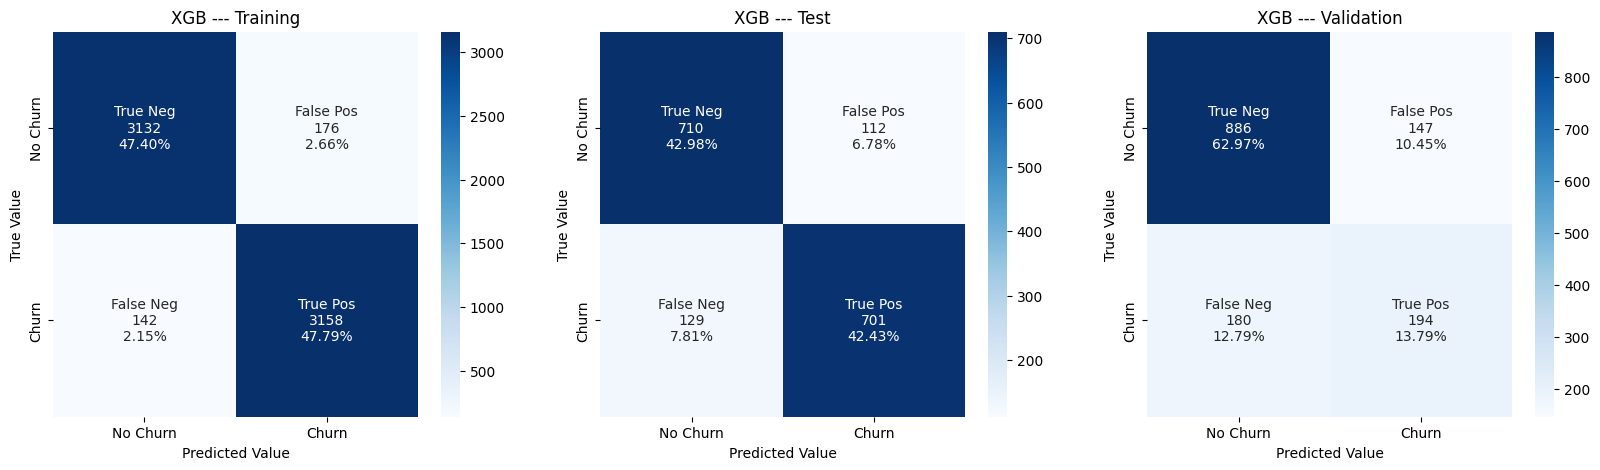

In [ ]:
confusion_matrix_viz(xgb, X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
y_pred = xgb.predict(X_train)
labels = ['No Churn', 'Churn']

print(classification_report(y_train, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.96      0.95      0.95      3308
       Churn       0.95      0.96      0.95      3300

    accuracy                           0.95      6608
   macro avg       0.95      0.95      0.95      6608
weighted avg       0.95      0.95      0.95      6608



In [ ]:
y_pred = xgb.predict(X_test)
labels = ['No Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.85      0.86      0.85       822
       Churn       0.86      0.84      0.85       830

    accuracy                           0.85      1652
   macro avg       0.85      0.85      0.85      1652
weighted avg       0.85      0.85      0.85      1652



In [ ]:
y_pred = xgb.predict(X_val)
labels = ['No Churn', 'Churn']

print(classification_report(y_val, y_pred, target_names= labels))

              precision    recall  f1-score   support

    No Churn       0.83      0.86      0.84      1033
       Churn       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407



**Observations:**
- In the training data, the XGBoost model also exhibits better performance compared to before applying SMOTE.
- It is evident that XGBoost maintains relatively stable performance between Test and Validation Data, with minor differences between the two datasets.
- After applying SMOTE, this model shows a significant improvement in all precision, recall, and F1-score values. The accuracy value also remains at 0.77, the same as the previous model, indicating consistent performance with the previous model.

## **Conclusion:**

- After applying SMOTE, overall, all three models demonstrate significantly improved performance, as evidenced by higher precision, recall, and F1-score values.
- From the three models, XGBoost shows the most balanced and overall better performance compared to the others. In the case of predicting churn, where we focus on churn information in the data, XGBoost exhibits a precision of 0.57, slightly lower than Random Forest (0.58), but with a higher recall of 0.52 compared to Random Forest (0.50). This is crucial because a higher recall indicates that the model can correctly identify more positive cases (Churn), meaning fewer "Churn" cases are missed by the model, thus reducing false negatives. Additionally, comparing the accuracies of the three models, Decision Tree (0.71), Random Forest (0.77), and XGBoost (0.77), XGBoost demonstrates high accuracy. Therefore, the best model is XGBoost.

### **Feature importances contribution of Models**

In [ ]:
def feature_importance_viz(model, feature):

    name = type(model).__name__
    name = re.findall('[A-Z][^A-Z]*', name)
    model_name = ''.join(name[:-1])

    feature_importance = model.feature_importances_
    importance = pd.Series(feature_importance, index = feature.columns)

    fig, ax = plt.subplots(figsize=(7,7))
    importance.plot.barh(ax=ax)
    ax.set_title("Feature importances contribution of " + model_name)

    plt.show()

### **Decission Tree**

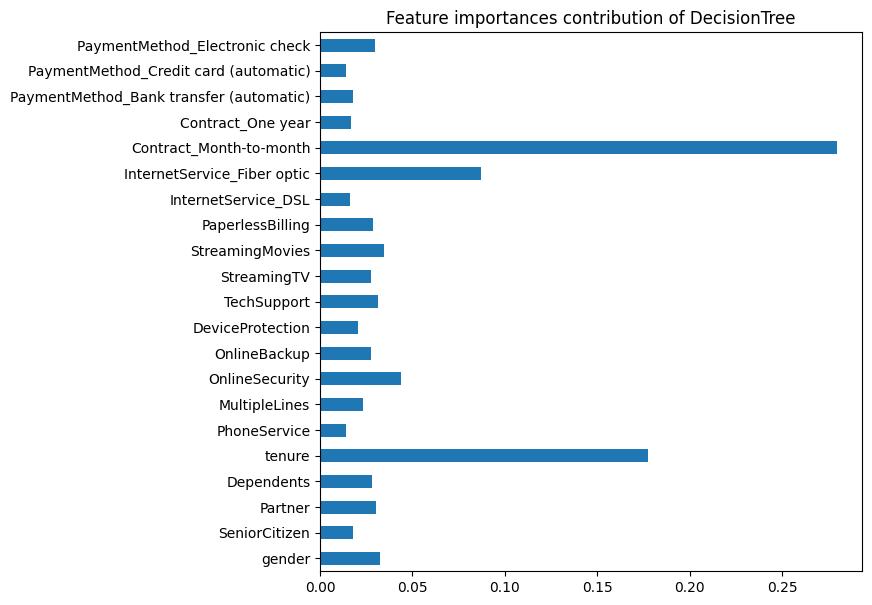

In [ ]:
feature_importance_viz(tree, feature)

The decision tree assigns the highest importance to the month-to-month contract feature, indicating its significant impact on predicting churn, followed by tenure, which reflects customer loyalty. The decision tree model suggests that customer churn prediction is strongly influenced by contract type, particularly month-to-month contracts, indicating that customers with such contracts are more likely to churn. Additionally, tenure emerges as another crucial factor, indicating that longer-tenured customers are generally more loyal and less likely to churn. This insight underscores the importance of understanding contract dynamics and fostering customer loyalty to mitigate churn rates effectively.

### **Random Forest**

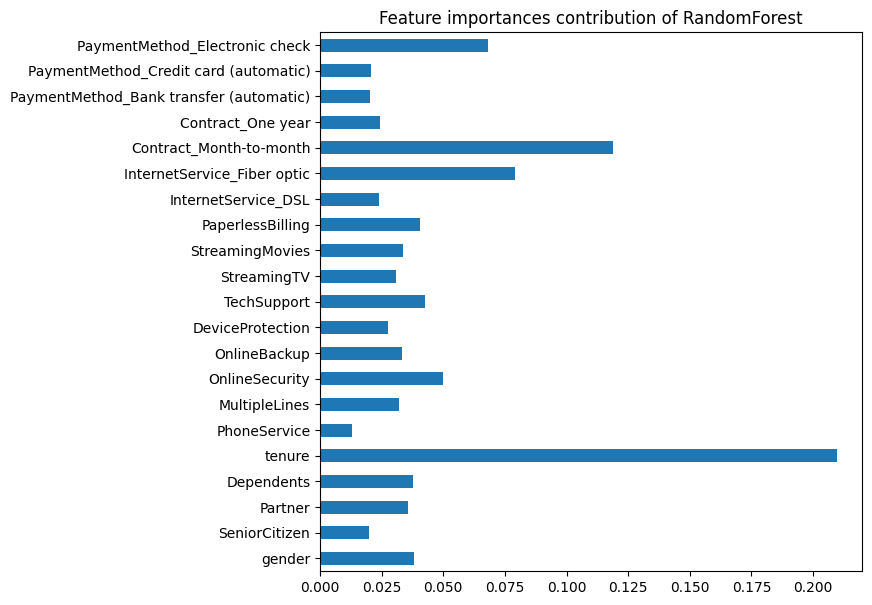

In [ ]:
feature_importance_viz(forest, feature)

In the random forest model, tenure emerges as the most important feature, indicating its significant role in predicting churn, followed by month-to-month contracts, which hold secondary importance compared to tenure. The random forest model indicates that customer churn prediction is primarily influenced by tenure, emphasizing the critical role of customer loyalty and retention duration. This underscores the importance of fostering long-term relationships with customers to mitigate churn rates effectively. Additionally, while month-to-month contracts still play a role, they are overshadowed by tenure, highlighting the significance of understanding and prioritizing factors that contribute to long-term customer engagement.

### **XGboost**

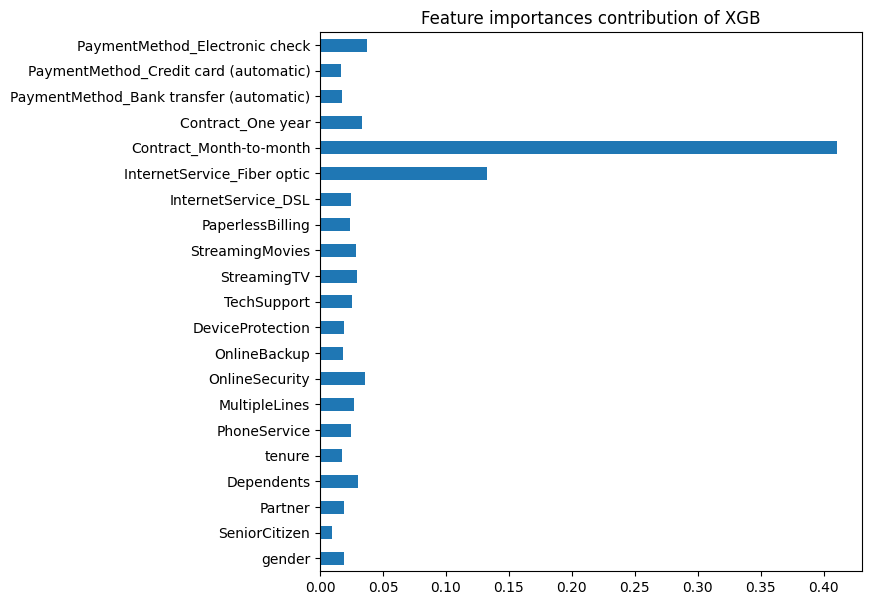

In [ ]:
feature_importance_viz(xgb, feature)

In the XGBoost model, month-to-month contracts and fiber optic internet service emerge as the most important features, indicating their significant influence on predicting customer churn. Month-to-month contracts signify higher churn potential due to their flexible nature, while the presence of fiber optic internet service suggests potential factors related to connectivity that may contribute to churn. the XGBoost model highlights the critical role of contract type, particularly month-to-month contracts, in predicting customer churn. This underscores the importance of understanding the impact of contract flexibility on customer retention strategies. Additionally, the significance of fiber optic internet service suggests that factors related to connectivity quality may also influence churn rates, emphasizing the need to address service quality and customer satisfaction to mitigate churn effectively.